In [58]:
# importing common library :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# importing classifier libraries :

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# importing other libraries :
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [180]:
df = pd.read_csv("creditcard.csv")

In [181]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [182]:
print("class for the no frauds " + str(round(df["Class"].value_counts()[0]/len(df) * 100,2)))
print("class for the frauds " + str(round(df["Class"].value_counts()[1]/len(df) * 100,2)))

class for the no frauds 99.83
class for the frauds 0.17


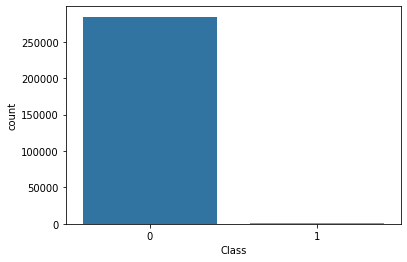

In [183]:
sns.countplot("Class",data = df)

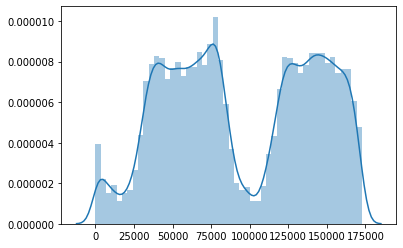

In [49]:
# Look at the distribution of the data using the displot
#fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['Amount'].values
time_val = df['Time'].values
#sns.distplot(amount_val)
sns.distplot(time_val)
#plt.show()

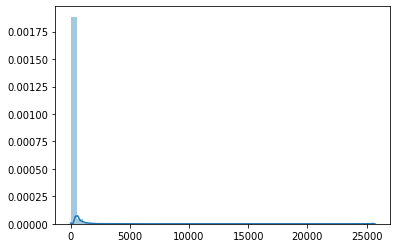

In [50]:
sns.distplot(amount_val)

In [184]:
# scaling only the time and amout columns :

from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(["Amount","Time"],axis = 1, inplace = True)

In [186]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [185]:
# Change position for the scaled_amount and scaled_time columns
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(["scaled_amount","scaled_time"],axis =1, inplace = True)
df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)

In [187]:
# Now sub sampling needs to be done :
df = df.sample(frac =1)
#fraud_df = df.loc[df['Class'] == 1]
#fraud_df
fraud_df = df[df["Class"] == 1]
non_fraud_df = df[df["Class"] == 0][:492]

normal_distributed_df = pd.concat([fraud_df,non_fraud_df])
new_df = normal_distributed_df.sample(frac = 1,random_state = 42)
len(new_df)

984

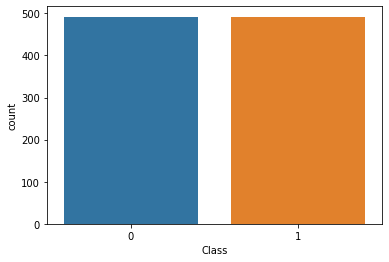

In [188]:
# amount of fraud classes 492 rows.
sns.countplot("Class",data = new_df)

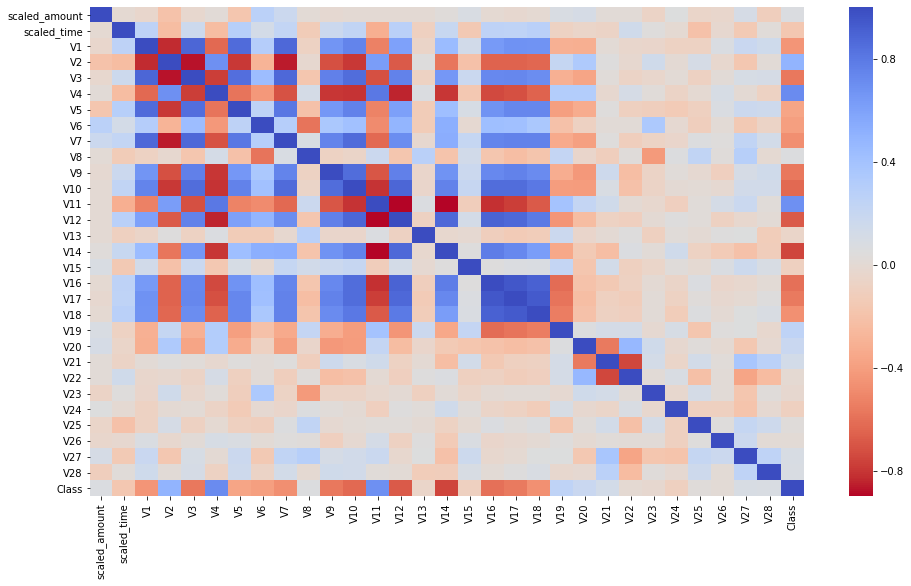

In [189]:
# checking the coorelation :
sub_sample_corr = new_df.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(sub_sample_corr,cmap='coolwarm_r')

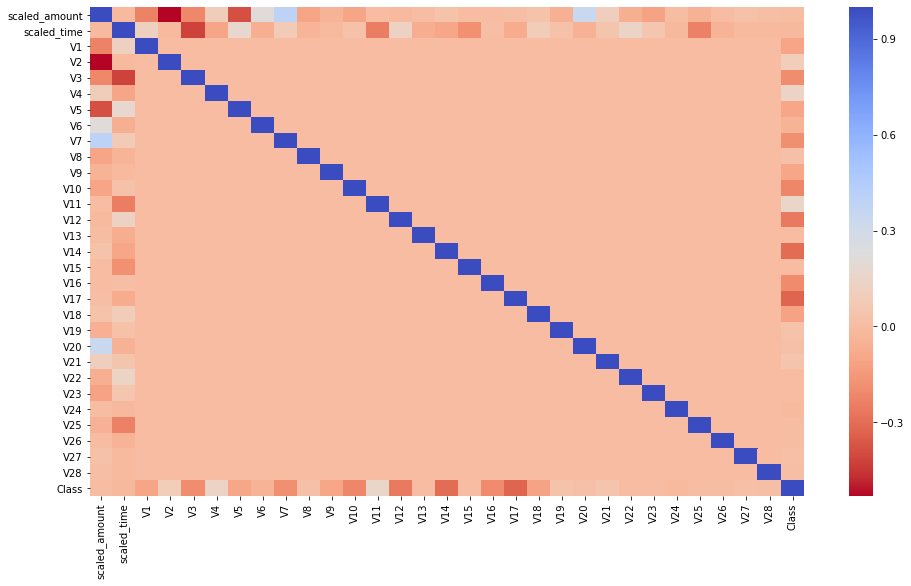

In [117]:
# Cheking previous Coorelations :
sub_sample_corr = df.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(sub_sample_corr,cmap='coolwarm_r')

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

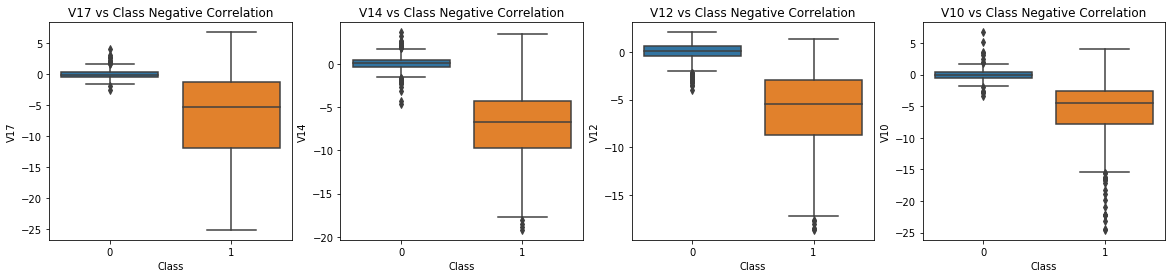

In [190]:
# Checking negative Coorelations using boxplot :
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class",y="V17",data= new_df,ax=axes[0]).set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class",y="V14",data= new_df,ax=axes[1]).set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class",y="V12",data= new_df,ax=axes[2]).set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class",y="V10",data= new_df,ax=axes[3]).set_title('V10 vs Class Negative Correlation')

Text(0.5, 1.0, 'V19 vs Class positive Correlation')

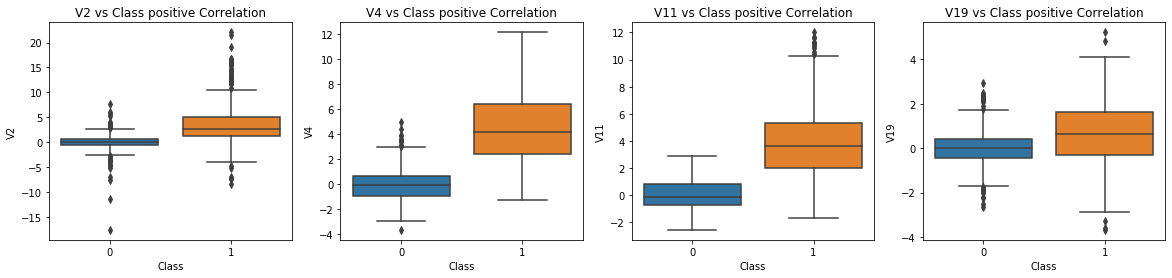

In [127]:
# Checking positive Coorelations using boxplot :
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class",y="V2",data= new_df,ax=axes[0]).set_title('V2 vs Class positive Correlation')
sns.boxplot(x="Class",y="V4",data= new_df,ax=axes[1]).set_title('V4 vs Class positive Correlation')
sns.boxplot(x="Class",y="V11",data= new_df,ax=axes[2]).set_title('V11 vs Class positive Correlation')
sns.boxplot(x="Class",y="V19",data= new_df,ax=axes[3]).set_title('V19 vs Class positive Correlation')

Text(0.5, 1.0, 'V10 Distribution')

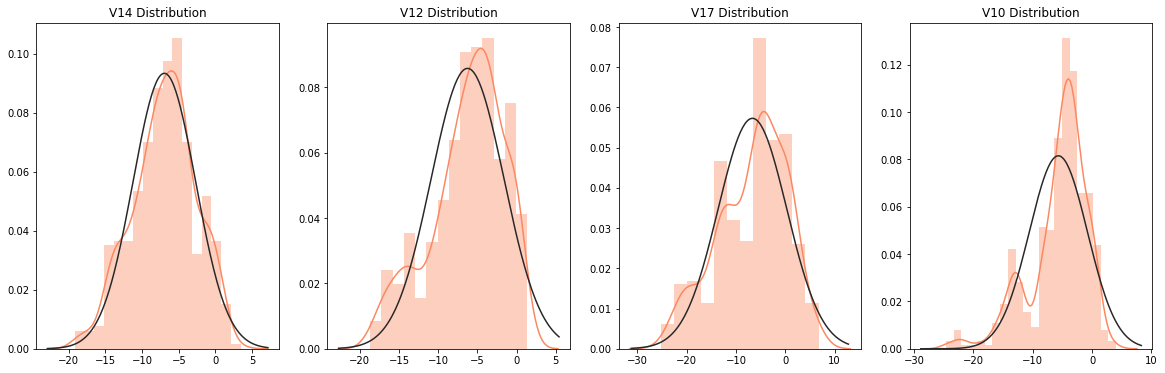

In [191]:
# Anomaly Detection :
from scipy.stats import norm

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
v17_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
f, ax = plt.subplots(1,4, figsize=(20, 6))
sns.distplot(v14_fraud_dist,ax = ax[0],fit=norm, color='#FB8861').set_title('V14 Distribution')
sns.distplot(v12_fraud_dist,ax = ax[1],fit=norm, color='#FB8861').set_title('V12 Distribution')
sns.distplot(v17_fraud_dist,ax = ax[2],fit=norm, color='#FB8861').set_title('V17 Distribution')
sns.distplot(v10_fraud_dist,ax = ax[3],fit=norm, color='#FB8861').set_title('V10 Distribution')

In [192]:
# Check and indentifying outliers for V14:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25 =  np.percentile(v14_fraud, 25)
q75 = np.percentile(v14_fraud,75)
v14iqr = q75-q25
v14thld = v14iqr * 1.25
v14lower = q25 - v14thld
v14upper = q75 + v14thld
print('Threshold: {}'.format(v14thld))
print('V14 Lower: {}'.format(v14lower))
print('V14 Upper: {}'.format(v14upper))
# now remove outliers:

outliers = [item for item in v14_fraud if item > v14upper or item < v14lower]
print(outliers)
new_df = new_df.drop(new_df[(new_df["V14"] > v14upper ) | (new_df["V14"] < v14lower )].index)

Threshold: 6.762377644356898
V14 Lower: -16.455100609329282
V14 Upper: 2.4795567948700326
[-17.7216383537133, -18.4937733551053, -17.230202160711, 3.4424219959421496, -17.4759212828566, -18.8220867423816, -18.049997689859396, -17.6206343516773, -19.2143254902614]


In [193]:
# Check and indentifying outliers for V12:
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
v12q25 =  np.percentile(v12_fraud, 25)
v12q75 = np.percentile(v12_fraud,75)
v12iqr = v12q75-v12q25
v12thld = v12iqr * 1.25
v12lower = v12q25 - v12thld
v12upper = v12q75 + v12thld
print('Threshold: {}'.format(v12thld))
print('V12 Lower: {}'.format(v12lower))
print('V12 Upper: {}'.format(v12upper))
# now remove outliers:

outliers = [item for item in v12_fraud if item > v12upper or item < v12lower]
print(outliers)
new_df = new_df.drop(new_df[(new_df["V12"] > v12upper ) | (new_df["V12"] < v12lower )].index)

Threshold: 7.185933326434393
V12 Lower: -15.820833736439807
V12 Upper: 4.299779577576492
[-15.969207520809, -16.4655039422141, -16.218610393127, -17.1504052507291, -17.003289445516, -15.835718807734402, -17.003289445516, -16.0603057628826, -17.1829184301947, -18.4311310279993, -18.047596570821604, -17.1829184301947, -18.553697009645802, -16.4655039422141, -18.683714633344298, -16.0603057628826]


In [194]:
# Check and indentifying outliers for V10:
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
v10q25 =  np.percentile(v10_fraud, 25)
v10q75 = np.percentile(v10_fraud,75)
v10iqr = v10q75-v10q25
v10thld = v10iqr * 1.25
v10lower = v10q25 - v10thld
v10upper = v10q75 + v10thld
print('Threshold: {}'.format(v10thld))
print('V10 Lower: {}'.format(v10lower))
print('V10 Upper: {}'.format(v10upper))
# now remove outliers:

outliers = [item for item in v10_fraud if item > v10upper or item < v10lower]
print(outliers)
new_df = new_df.drop(new_df[(new_df["V10"] > v10upper ) | (new_df["V10"] < v10lower )].index)

Threshold: 5.519320746307469
V10 Lower: -12.364147978374348
V10 Upper: 3.089950111286564
[-13.608143162727899, -15.2318333653018, -13.175198078736, -15.346098846877501, -12.805683189811699, -19.836148851696, -12.8306571996417, -16.3035376590131, -13.0094028057641, -17.141513641289198, -22.1870885620007, -20.949191554361104, -24.5882624372475, -14.110184441545698, -12.8881582878915, -12.618162687238, -14.166794659606, 4.03143505114991, -15.563791338730098, 3.24508640095346, -22.1870885620007, -16.2556117491401, -13.6705451263516, -16.7460441053944, -13.3482776536659, -24.403184969972802, -22.1870885620007, -13.2025771482197, -15.563791338730098, -15.1237521803455, -12.780633936202099, -13.2151722995049, -14.557159052885899, -13.002709301069698, -12.7447607871859, -16.6496281595399, -13.2025771482197, -13.386683439524601, -12.6959474039839, -13.2616517082667, -18.2711681738888, -15.124162814494698, -14.676470249746401, -12.835737682533901, -13.0888909176936, -23.2282548357516, -14.226698

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

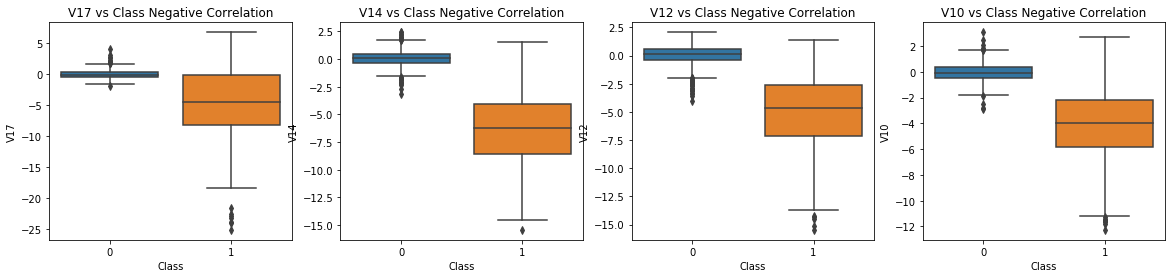

In [195]:
# Again Check using boxplot if there are any reduction in outliers :
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class",y="V17",data= new_df,ax=axes[0]).set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class",y="V14",data= new_df,ax=axes[1]).set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class",y="V12",data= new_df,ax=axes[2]).set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class",y="V10",data= new_df,ax=axes[3]).set_title('V10 vs Class Negative Correlation')

In [197]:
# Implementing the classifier to identify and separates fraud and non-fraud transactions:

X = new_df.drop("Class",axis=1 )
Y = new_df["Class"]

In [206]:
X_Train,X_Test,Y_Train,Y_Test =  train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [209]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_Train.values
X_test = X_Test.values
y_train = Y_Train.values
y_test = Y_Test.values

In [211]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [230]:
from sklearn.model_selection import cross_val_score

for item,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier : " +  item + " has " + str(round(training_score.mean(),2)))




Classifier : LogisiticRegression has 0.93
Classifier : KNearest has 0.93
Classifier : Support Vector Classifier has 0.93
Classifier : DecisionTreeClassifier has 0.9
